In [1]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pymc as pm
import daft

import scipy.stats as stats

%matplotlib inline

## Decision Tree based ML methods

We form decision trees based on market factors, such as interest rates, oil price, precious metal price. (We just consider three market factors for this example so we can visualize in 3D.) 
These three market factors are represented numerically as 0 or 1.  
For example, we represent 'High interest rate/Low oil price/High precious metal' as $[1,0,1]$

We make three types of actions, also represented by 0, 1, 2. We make decision trees out of recommended actions (targets) based on market factor combinations (keys). 

Note: Exact mechanism to generate decision tree out of 'keys-targets', it is based on specific mathod we use, via sklearn. Random forest is one such method.

In [41]:
# for example, when market factor combination is [0,0,0] our action is 0
market_factors = [[0,0,0],[1,0,0], [0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[1,1,1]]
actions = [0,1,2,0,0,1,2,2] # this is 'target' of decision tree

m_factors = pd.DataFrame(market_factors)

There are many ML algorithms based on decision tree.  'Random Forest' is a very popular variation.   

In [42]:
clf = RandomForestClassifier()
clf = clf.fit(m_factors, actions)

Now, based on this random forest classifier, we can see that recommended action is 0 when market factor combination is $[1.1, 0.5, 0.2]$ 

In [43]:
clf.predict([[1.1, 0.5, 0.2]])

array([0])

Now we generate test market conditions.

In [60]:
test_x = np.random.rand(55)
test_x = 3.*test_x - 0.5

test_y = np.random.rand(55)
test_y = 3.*test_y - 0.5

test_z = np.random.rand(55)
test_z = 3.*test_z - 0.5

test = pd.DataFrame(zip(test_x, test_y, test_z))

result = clf.predict(test)

#print test
#print result

Next we scatter graph test market factor combinations and recommended actions by random forest.

In [61]:
colors = ''
for bean in range(len(result)):
    if result[bean] ==0:
        colors = colors + 'r'
    elif result[bean] == 1:
        colors = colors + 'y'
    else:
        colors = colors + 'b'
    
#print colors

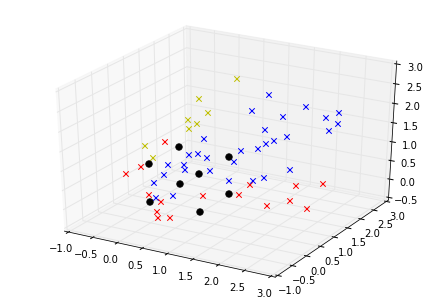

In [62]:
fig = plt.figure()
ax = Axes3D(fig)

for i, color in zip(range(len(m_factors)),'kkkkkkkk'):
    ax.scatter(m_factors[0][i],m_factors[1][i],m_factors[2][i], c=color,s=40)

for j, color in zip(range(len(result)), colors):
    ax.scatter(test[0][j], test[1][j],test[2][j], c=color, s=30, marker='x')

#### Remark

- Decision tree is conceptually simple but generating an efficient tree from key-target requires information theoritic notions. For example, ID3 algorithm is based on entropy minimization.

- sklearn does most heavy work, and using algorithms such as RandomForest, ExtraTree, AdaBoost are simple.  However, they produce all different results.    It usually requires to understand inner workings of these algorithms.

- sklearn also provides statistics to help understand how appropriate decision tree is for data.

- Random forest might be the most popular ML tool for beginners.